In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
movies_metadata = pd.read_csv("movies.csv", low_memory=False)
ratings_small = pd.read_csv("ratings.csv")

In [5]:
movies_metadata['budget'] = pd.to_numeric(movies_metadata['budget'], errors='coerce')
movies_metadata['revenue'] = pd.to_numeric(movies_metadata['revenue'], errors='coerce')
movies_metadata['release_date'] = pd.to_datetime(movies_metadata['release_date'], errors='coerce')
movies_metadata['genres'] = movies_metadata['genres'].fillna('[]')
movies_metadata['genres'] = movies_metadata['genres'].apply(lambda x: ', '.join([d['name'] for d in eval(x) if 'name' in d]) if x != '[]' else '')

In [6]:
movies_metadata = movies_metadata[['id', 'title', 'genres', 'release_date', 'budget', 'revenue', 'vote_average', 'vote_count']]
movies_metadata['id'] = pd.to_numeric(movies_metadata['id'], errors='coerce')

In [7]:
ratings_small['movieId'] = pd.to_numeric(ratings_small['movieId'], errors='coerce')

In [8]:
merged_data = pd.merge(ratings_small, movies_metadata, left_on='movieId', right_on='id', how='inner')


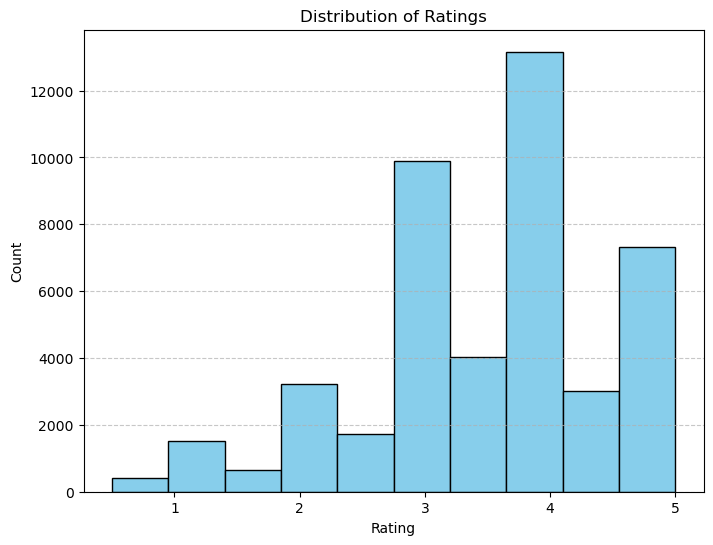

In [9]:
plt.figure(figsize=(8, 6))
plt.hist(merged_data['rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
genre_ratings = merged_data.explode('genres')
genre_ratings = genre_ratings[genre_ratings['genres'] != '']
avg_genre_ratings = genre_ratings.groupby('genres')['rating'].mean().sort_values(ascending=False)

In [26]:
plt.figure(figsize=(150,50))
plt.bar(avg_genre_ratings.index, avg_genre_ratings.values, color='orange', edgecolor='black')
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

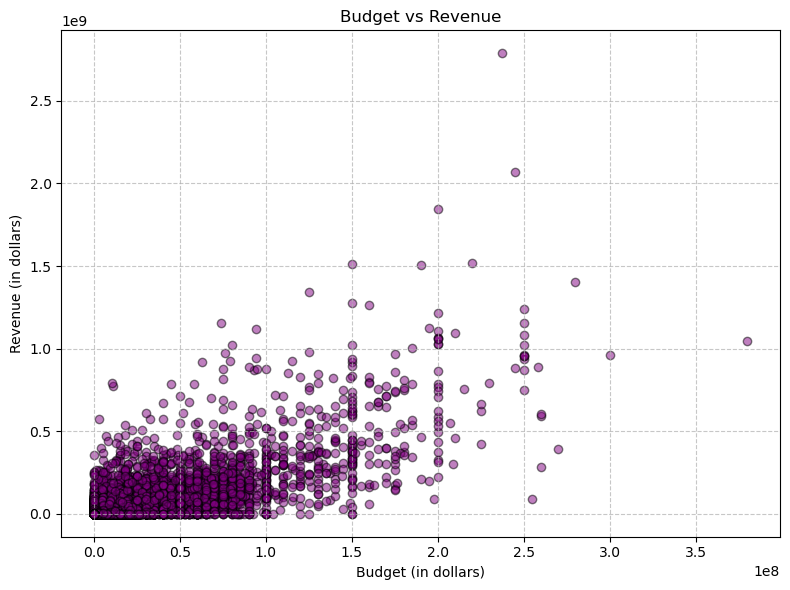

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(movies_metadata['budget'], movies_metadata['revenue'], alpha=0.5, color='purple', edgecolor='black')
plt.title('Budget vs Revenue')
plt.xlabel('Budget (in dollars)')
plt.ylabel('Revenue (in dollars)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

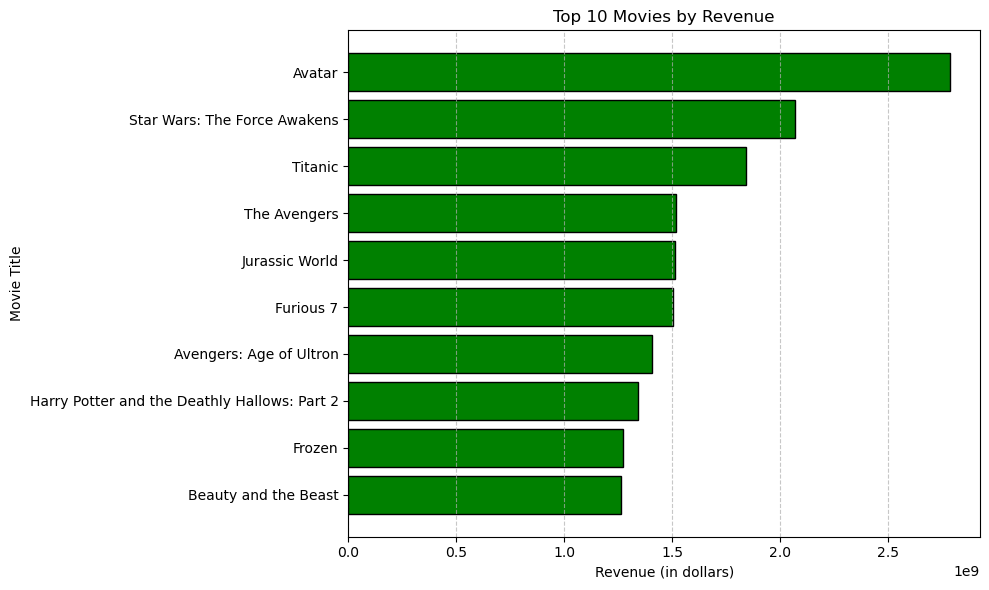

In [16]:
top_movies = movies_metadata.sort_values(by='revenue', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_movies['title'], top_movies['revenue'], color='green', edgecolor='black')
plt.title('Top 10 Movies by Revenue')
plt.xlabel('Revenue (in dollars)')
plt.ylabel('Movie Title')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()